<a href="https://colab.research.google.com/github/harsh21CSU182/Harsh-Kaushik-RL/blob/main/THOMPSONG_SAMPLING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

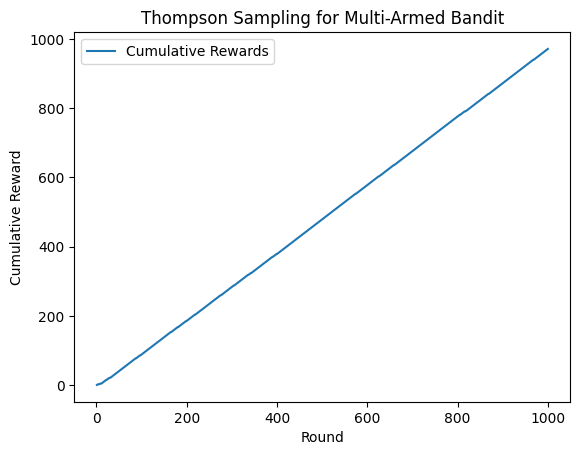

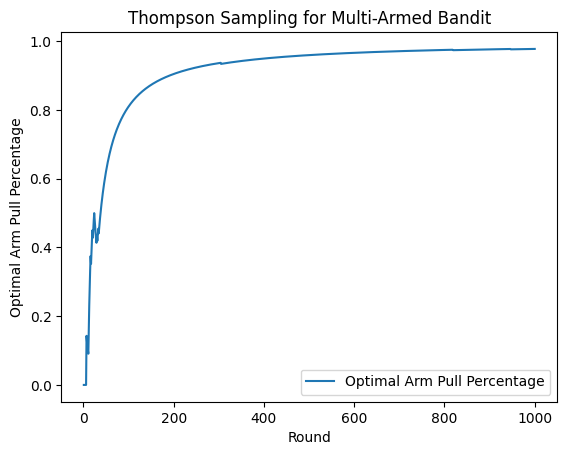

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Number of arms
num_arms = 5

# True probability of success for each arm (unknown to the agent)
true_probabilities = np.random.uniform(0, 1, num_arms)

# Number of rounds/pulls
num_rounds = 1000

# Variables to keep track of each arm's successes and failures
successes = np.zeros(num_arms)
failures = np.zeros(num_arms)

# Variables to store cumulative rewards and optimal arm pulls
cumulative_rewards = np.zeros(num_rounds)
optimal_pulls = np.zeros(num_rounds)

# Thompson Sampling algorithm
for round in range(num_rounds):
    # Sample a probability of success for each arm from Beta distribution
    sampled_probabilities = np.random.beta(successes + 1, failures + 1)

    # Choose the arm with the highest sampled probability
    chosen_arm = np.argmax(sampled_probabilities)

    # Simulate pulling the chosen arm and observe the reward
    reward = np.random.binomial(1, true_probabilities[chosen_arm])

    # Update successes and failures for the chosen arm
    successes[chosen_arm] += reward
    failures[chosen_arm] += 1 - reward

    # Update cumulative rewards and optimal arm pulls
    cumulative_rewards[round] = cumulative_rewards[max(round - 1, 0)] + reward
    optimal_pulls[round] = (chosen_arm == np.argmax(true_probabilities))

# Plot cumulative rewards over time
plt.plot(np.arange(1, num_rounds + 1), cumulative_rewards, label='Cumulative Rewards')
plt.xlabel('Round')
plt.ylabel('Cumulative Reward')
plt.title('Thompson Sampling for Multi-Armed Bandit')
plt.legend()
plt.show()

# Plot percentage of optimal arm pulls over time
optimal_pull_percentages = np.cumsum(optimal_pulls) / np.arange(1, num_rounds + 1)
plt.plot(np.arange(1, num_rounds + 1), optimal_pull_percentages, label='Optimal Arm Pull Percentage')
plt.xlabel('Round')
plt.ylabel('Optimal Arm Pull Percentage')
plt.title('Thompson Sampling for Multi-Armed Bandit')
plt.legend()
plt.show()
